# 1) Problem Statement

The main objective of this project is to identify whether the passeneger is satisfied or not with the airline service based on several parameters

#### Source dataset: https://www.kaggle.com/sjleshrac/airlines-customer-satisfaction

### Importing the libraries and dataset required for analysis

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
%matplotlib inline
#The pandas library loads the csv data file from the diretory

al=pd.read_csv('C:\\Users\\ADMIN\\Documents\\DMML\\Invistico_Airline.csv')
al

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


## 2) Exploratory data analysis

Displaying the count and datatype of each of the feature

In [36]:
# Information of the data is presented
al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [37]:
#Verifying the presence of null values
al.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

'Arrival Delay in Minutes' column has 393 null values 

In [38]:
# Null values are handled by removing rows containing no values since they are fewer compared to total entries 

In [39]:
# The rows with null values are dropped and again verified to find presence of any other missing values

al_copy=al.copy()
al.dropna(inplace=True)
al.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [40]:
# Displaying information after null value removal
al.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Seat comfort                       129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Food and drink                     129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Inflight wifi service              1294

In [41]:
# Checking count of each of the categorical variables

In [42]:
levels = ["satisfaction", "Gender", "Customer Type", "Type of Travel", "Class"]
for l in levels:
    print ("{} \n".format(al[l].value_counts()))


satisfied       70882
dissatisfied    58605
Name: satisfaction, dtype: int64 

Female    65703
Male      63784
Name: Gender, dtype: int64 

Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64 

Business travel    89445
Personal Travel    40042
Name: Type of Travel, dtype: int64 

Business    61990
Eco         58117
Eco Plus     9380
Name: Class, dtype: int64 



#### Converting the categorical variables to numeric form

In [43]:
 
satisfaction_m = {"satisfied": 1,"dissatisfied": 0 }
al['satisfaction']  = al['satisfaction'].replace(satisfaction_m)

#Convert Male and Female in number 
Gender_m = {"Male": 1,"Female": 2 }
al['Gender']  = al['Gender'].replace(Gender_m)

#Convert Loyal and disloyal in number 
Customer_Type_m = {"Loyal Customer": 1,"disloyal Customer": 0 }
al['Customer Type']  = al['Customer Type'].replace(Customer_Type_m)

#Convert Business travel and Business travel in number 
Type_of_Travel_m = {"Business travel": 1,"Personal Travel": 2 }
al['Type of Travel']  = al['Type of Travel'].replace(Type_of_Travel_m)

#Convert Business and Eco and Eco plus in number 
Class_m = {"Business": 1,"Eco": 3, "Eco Plus": 2 }
al['Class']  = al['Class'].replace(Class_m)

In [44]:
# The dataframe with the transformation of categorical string values to numeric are representated

al

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,2,1,65,2,3,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,1,47,2,1,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,2,1,15,2,3,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,2,1,60,2,3,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,2,1,70,2,3,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,2,0,29,2,3,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,1,0,63,2,1,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,1,0,69,2,3,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,1,0,66,2,3,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


## 3) Inference from Visualizations

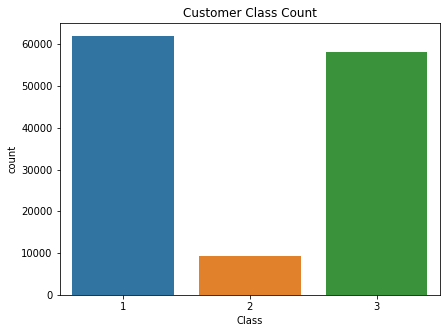

In [45]:
# Display of count for different classes

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title('Customer Class Count')
sns.countplot(x='Class',data=al)

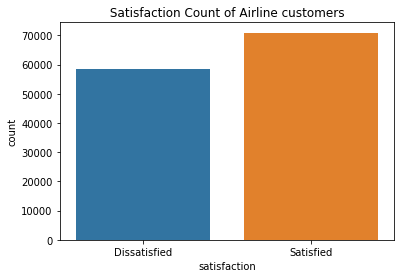

In [46]:
#  Display of satisfaction count of passenegers

sns.countplot(x="satisfaction", data=al)
plt.title(' Satisfaction Count of Airline customers ')
plt.xticks([0,1],['Dissatisfied',"Satisfied"])
plt.show()

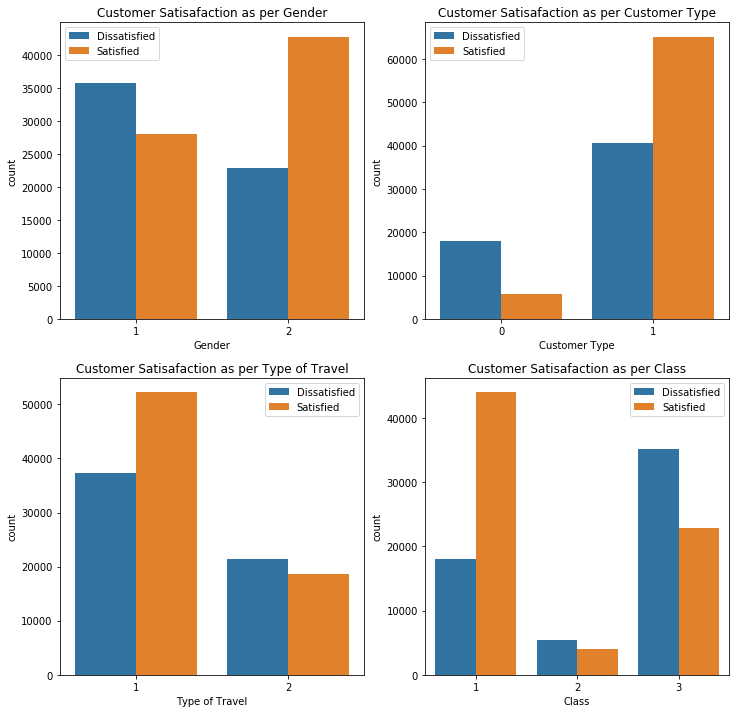

In [47]:
# Illustration of the number of satisfied and dissatisified customers based on categorical fields such as (Gender, Customer Type,Travel Type and class) 

f,axs = plt.subplots(2,2,figsize=(12, 12))
col=['Gender', 'Customer Type', 'Type of Travel', 'Class']
count=0
for i in range(2):
  for j in range(2):
    sns.countplot(data=al,x=col[count],hue='satisfaction',ax=axs[i][j])
    axs[i][j].set_title('Customer Satisafaction as per {}'.format(col[count]))
    axs[i][j].legend(['Dissatisfied',"Satisfied"])
    count+=1

From the above figures, we find that

Female customers are comparatively, more satisfied than male customers.  
Loyal Customers show more satisfaction than disloyal ones.  
Business purpose travelers are satisfied higher than personal travelers.  
Business class passengers are greater in amount and are also comparitively more satisfied than customers travelling in economy or economy plus class.  

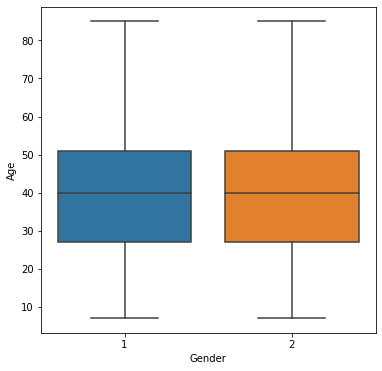

In [48]:
# The age distribution based on the gender is viewed using box plot 
plt.figure(figsize=(6,6))
sns.boxplot(x='Gender',y='Age',data=al)

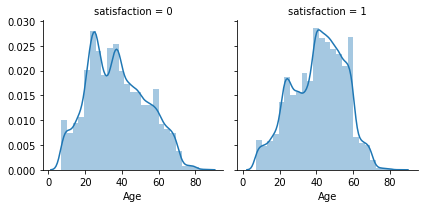

In [49]:
# The distance plot measure the satisfaction rate of passenger with age as the factor
d= sns.FacetGrid(al, col = "satisfaction")
d.map(sns.distplot, "Age", bins = 25)
plt.show()

Passeneger ages between 0 and 20 have a high dissatisfaction or neutral with the airline.  
Passeneger ages between 30 and 60 are satisified with the airline.  
Passeneger ages between 65 and 80  is neutral or dissatisfied.  

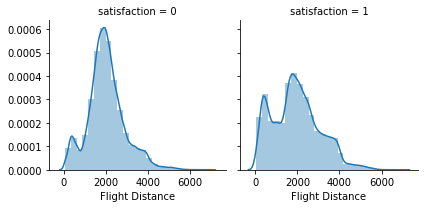

In [50]:
# The distance plot measure the satisfaction rate of passenger with flight distance as the factor
d= sns.FacetGrid(al, col = "satisfaction")
d.map(sns.distplot, "Flight Distance", bins = 25)
plt.show()

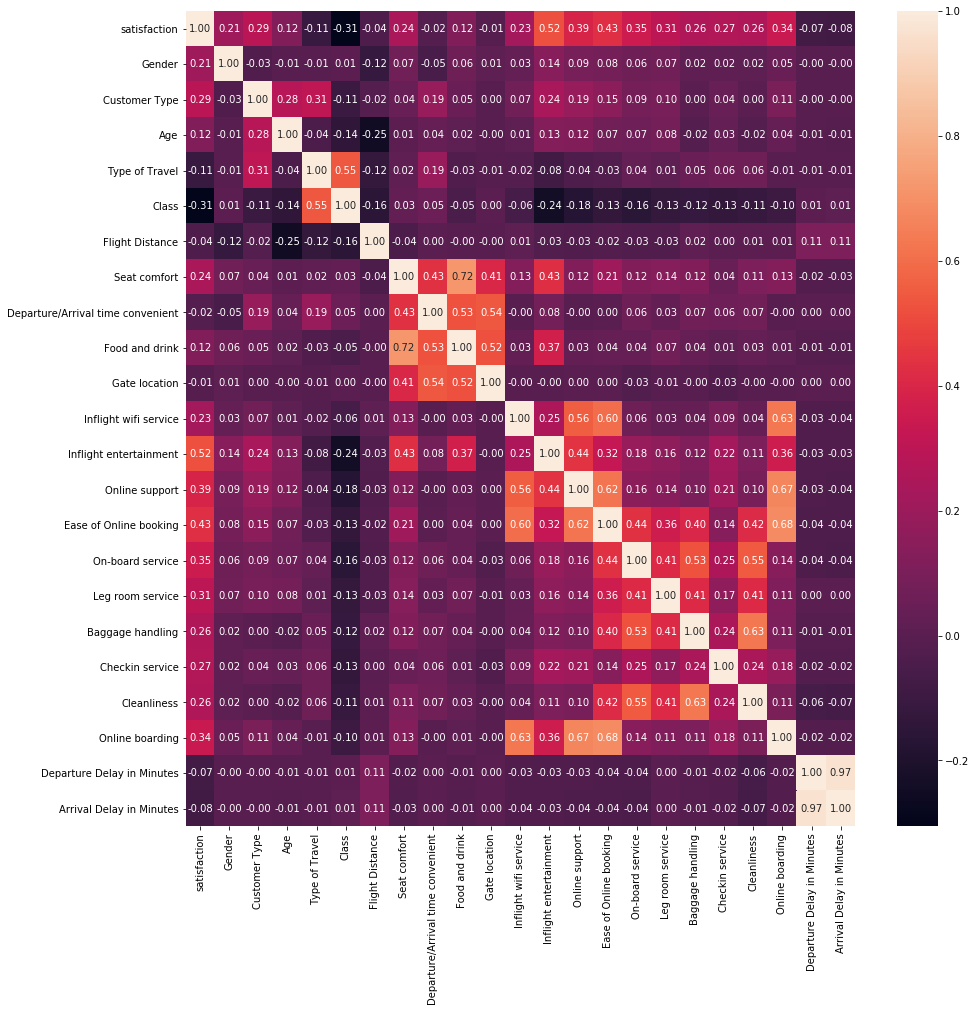

In [51]:
# Correlation between the variables is represented using heatmap of seaborn package
plt.subplots(figsize=(15,15)) 
sns.heatmap(al.corr(), annot = True, fmt = ".2f")
plt.show()

The features such as Flight Distance, Departure/Arrival time convenient,Gate location,Departure Delay in Minutes and Arrival Delay in Minutes have very low impact on passenger satisfaction. Therefore, these columns are dropped for further analysis

In [52]:
# Dropping the insignificant independent variables
al.drop(['Flight Distance','Departure/Arrival time convenient','Gate location','Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1,inplace=True)

In [53]:
# The dataframe after feature engineering
al

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,1,2,1,65,2,3,0,0,2,4,2,3,3,0,3,5,3,2
1,1,1,1,47,2,1,0,0,0,2,2,3,4,4,4,2,3,2
2,1,2,1,15,2,3,0,0,2,0,2,2,3,3,4,4,4,2
3,1,2,1,60,2,3,0,0,3,4,3,1,1,0,1,4,1,3
4,1,2,1,70,2,3,0,0,4,3,4,2,2,0,2,4,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,2,0,29,2,3,5,5,2,5,2,2,3,3,4,4,4,2
129876,0,1,0,63,2,1,2,2,2,1,1,3,2,3,3,1,2,1
129877,0,1,0,69,2,3,3,3,3,2,2,4,4,3,4,2,3,2
129878,0,1,0,66,2,3,3,3,3,2,2,3,3,2,3,2,1,2


### Outlier analysis

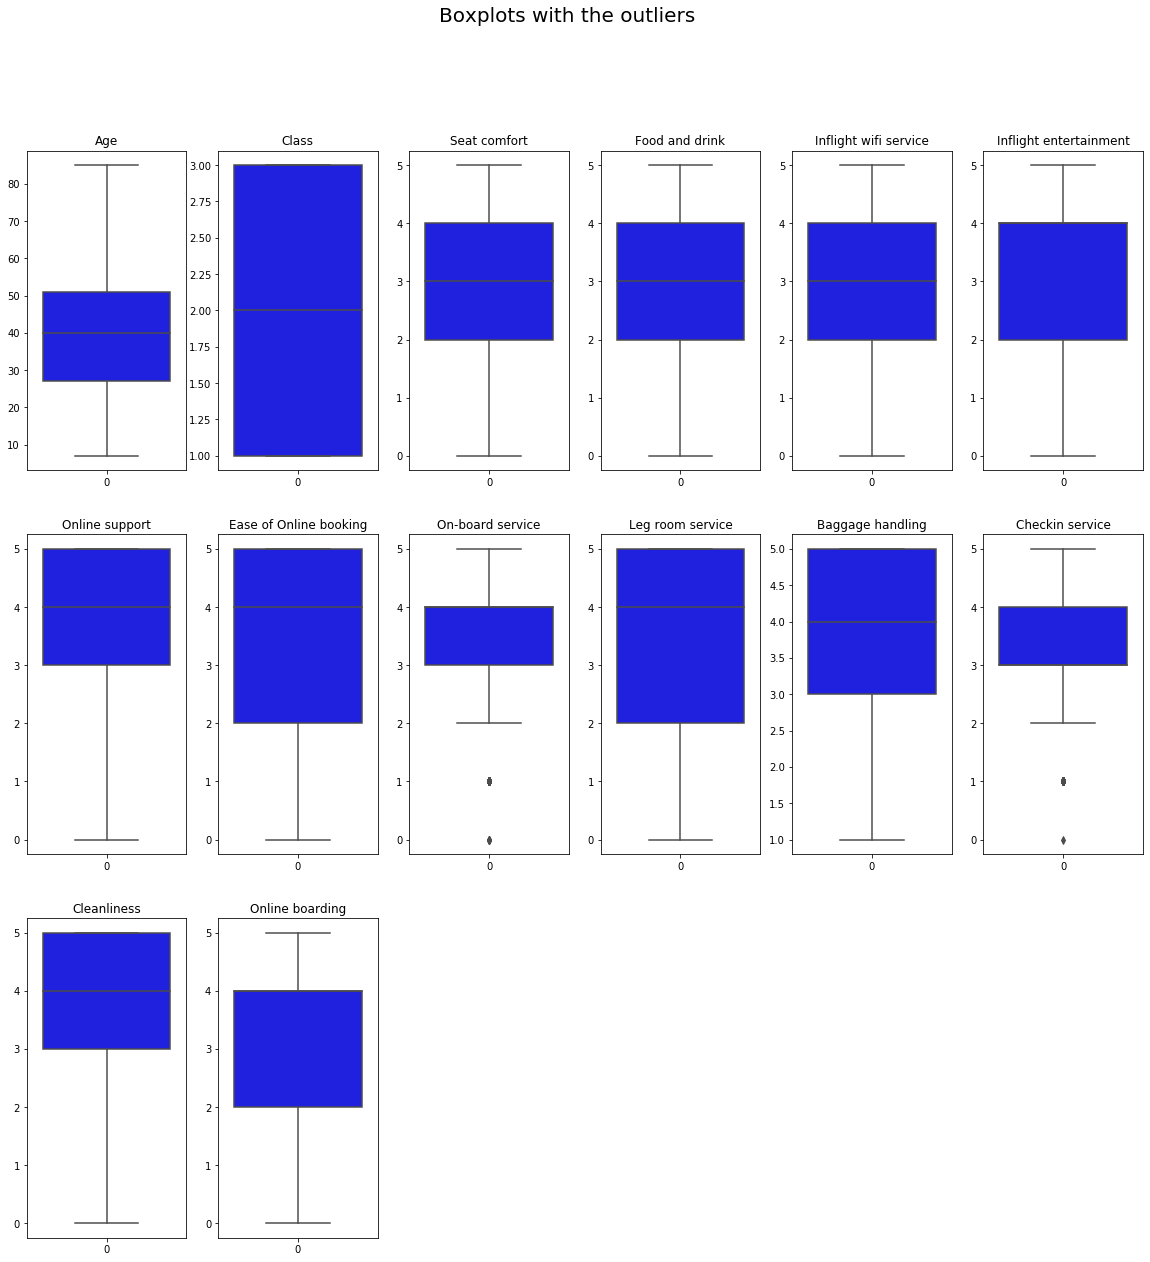

In [54]:
 # The boxplot to determine the outliers of all the predictors
oa = al.drop('satisfaction', axis=1).copy()
nb_columns = [column for column in oa.columns if len(oa[column].unique()) > 2]

plt.figure(figsize=(20, 20))

for i, column in enumerate(nb_columns):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(data=oa[column], color='blue')
    plt.title(column)

plt.suptitle("Boxplots with the outliers", size=20)
plt.show()


'On-board service','Checkin service' and 'Online boarding' columns shows the occurence of outliers

In [55]:
# Method for outlier removal
def outlier_removal(al, columns, threshold):
    al = al.copy()
    
 
    lower_bound = scipy.stats.norm.ppf(q=(threshold / 2), loc=0, scale=1)
    upper_bound = scipy.stats.norm.ppf(q=1 - (threshold / 2), loc=0, scale=1)
    
    # Calculate z-scores of every example in the columns specified
    outlier_al = al.loc[:, columns].copy()
    zscores = pd.DataFrame(scipy.stats.zscore(outlier_al, axis=0), index=outlier_al.index, columns=outlier_al.columns)
    

    lower_outliers = (zscores < lower_bound).any(axis=1)
    upper_outliers = (zscores >= upper_bound).any(axis=1)
    

    outliers = al[pd.concat([lower_outliers, upper_outliers], axis=1).any(axis=1)].index
    
    # Drop the outliers
    al = al.drop(outliers, axis=0).reset_index(drop=True)
    print(len(outliers), "examples dropped.")
    
    return al

36259 examples dropped.


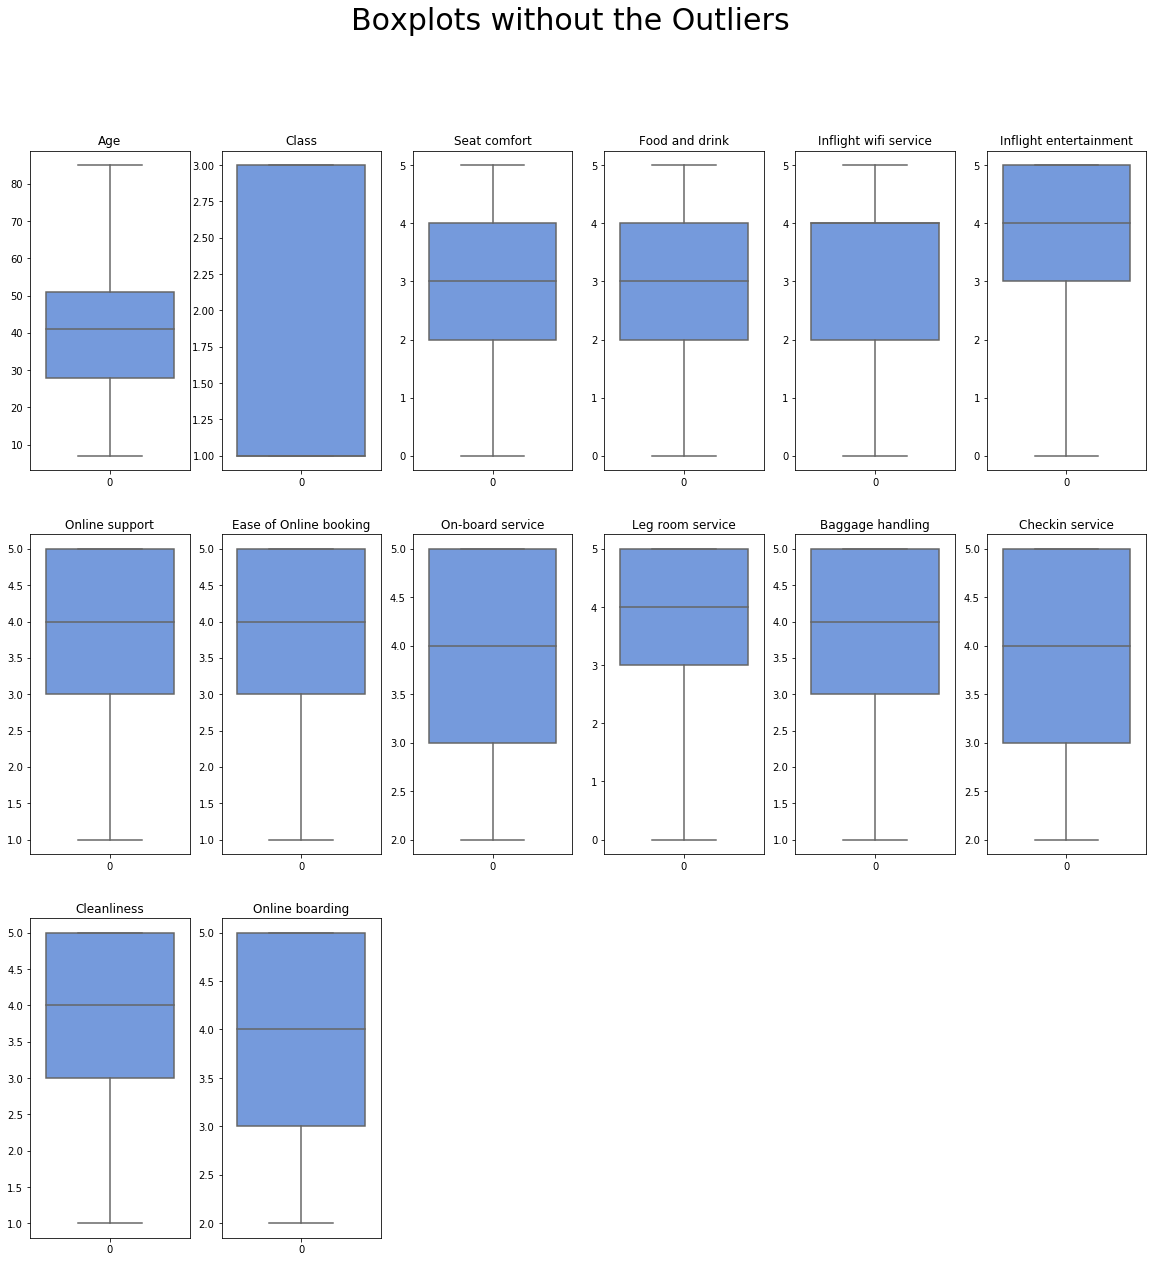

In [56]:
# The number of outliers dropped are analyzed
outliers_al = outlier_removal(
    al,
    columns=[
        'On-board service',
        'Checkin service',
        'Online boarding'
    ],
    threshold=0.08
)

plt.figure(figsize=(20, 20))

for i, column in enumerate(nb_columns):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(data=outliers_al[column], color='cornflowerblue')
    plt.title(column)

plt.suptitle("Boxplots without the Outliers", size=30)
plt.show()

## 4) Machine Learning Model Building

In [57]:
# The processed final data is split into train and test set

# Importing the sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score

# Dividing the predictor variables and target
X = al.drop('satisfaction',axis=1).values 
y = al['satisfaction'].values

#Train and Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

# Fitting the split data into standard scalar
sc  = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

print(X_train_sc, X_test_sc)

# Fitting the split data into min and max scalar
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

(103589, 17) (103589,)
(25898, 17) (25898,)
[[-1.01604742  0.47477601 -0.75210364 ...  0.52239684 -1.47940672
  -1.03908065]
 [ 0.98420603  0.47477601  1.29779395 ...  1.31564456  1.12379122
  -1.03908065]
 [ 0.98420603  0.47477601  1.23166822 ... -0.27085088 -1.47940672
  -0.26982502]
 ...
 [ 0.98420603  0.47477601  0.70266239 ... -0.27085088 -0.61167407
  -1.80833628]
 [-1.01604742 -2.10625638  1.49617114 ... -1.0640986   0.25605857
   0.49943062]
 [-1.01604742  0.47477601 -1.8101153  ...  1.31564456 -0.61167407
   1.26868625]] [[ 0.98962827 -2.13511208 -0.97042556 ... -0.26810025 -2.35906919
   1.26839523]
 [-1.01048043  0.46835949  1.34824601 ... -0.26810025  1.12322862
   0.49513425]
 [ 0.98962827  0.46835949  2.0107236  ... -0.26810025  0.25265417
   0.49513425]
 ...
 [ 0.98962827  0.46835949 -2.09663746 ... -1.06161571 -1.48849474
  -1.05138771]
 [ 0.98962827  0.46835949 -0.83793004 ... -0.26810025  0.25265417
  -1.05138771]
 [-1.01048043  0.46835949 -0.97042556 ...  0.52541521 

In [58]:
# Method to plot the learning curve for evaluation
from sklearn.model_selection import learning_curve, validation_curve
def plotLearningCurves(X_train, y_train, classifier, title):
    train_sizes, train_scores, test_scores = learning_curve(
            classifier, X_train, y_train, cv=5, scoring="accuracy")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label="Training Error")
    plt.plot(train_sizes, test_scores_mean, label="Cross Validation Error")
    
    plt.legend()
    plt.grid()
    plt.title(title, fontsize = 18, y = 1.03)
    plt.xlabel('Train Sizes', fontsize = 14)
    plt.ylabel('Score', fontsize = 14)
    plt.tight_layout()
    
    

In [25]:
# Imlementation of Logistic regression model with test and train
from sklearn.linear_model import LogisticRegression

lg1=LogisticRegression(max_iter=2500)
lg1.fit(X_train,y_train)
pred_log1=lg1.predict(X_test)

print('Confusion Matrix is\n',confusion_matrix(y_test,pred_log1))
print('Accuracy is', accuracy_score(y_test,pred_log1))

Confusion Matrix is
 [[ 9497  2194]
 [ 2153 12054]]
Accuracy is 0.8321492007104796


In [26]:
# Imlementation of Logistic regression model with Standard Scalar fitted test and train 
lg2=LogisticRegression(max_iter=2500)
lg2.fit(X_train_sc,y_train)
pred_log2=lg2.predict(X_test_sc)

print('Confusion Matrix is\n',confusion_matrix(y_test,pred_log2))
print('Accuracy is', accuracy_score(y_test,pred_log2))

Confusion Matrix is
 [[ 9517  2174]
 [ 2166 12041]]
Accuracy is 0.8324194918526527


In [27]:
# Imlementation of Logistic regression model with MinMax fitted test and train 
lg3=LogisticRegression(max_iter=2500)
lg3.fit(X_train_minmax,y_train)
pred_log3=lg3.predict(X_test_minmax)

print('Confusion Matrix is\n',confusion_matrix(y_test,pred_log3))
print('Accuracy is', accuracy_score(y_test,pred_log3))

Confusion Matrix is
 [[ 9793  1898]
 [ 2391 11816]]
Accuracy is 0.8343887558884856


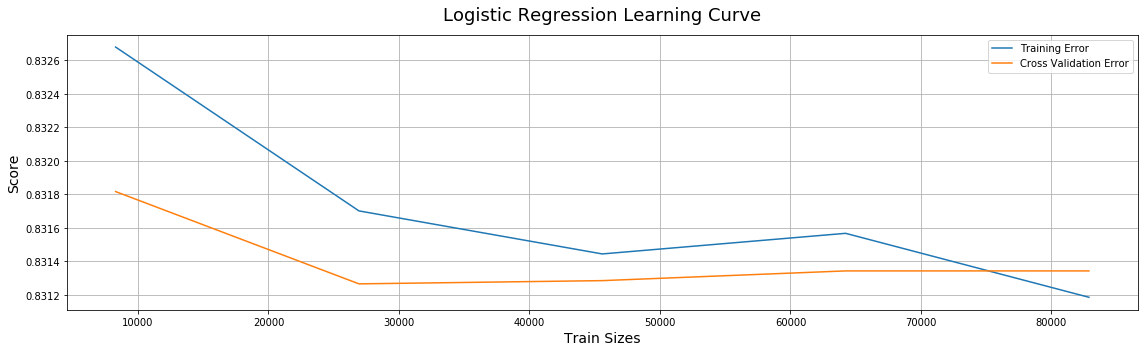

In [62]:
# Plotting the learning curve of Min Max predicted Logistic model

plt.figure(figsize = (16,5))
title = 'Logistic Regression Learning Curve'
plotLearningCurves(X_train_sc, y_train, lg3,title)

It is seen from the graph that training and testing error converges for higher training sizes which means less deviation from accuracy

### KNN algorithm

In [31]:
# Implementation of KNN model
from sklearn.neighbors import KNeighborsClassifier

for k in range(10,18):
  knn = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2) 
  knn.fit(X_train_sc,y_train)
  pred_knn = knn.predict(X_test_sc)

  print("k=",k)
  print('Confusion Matrix is ',confusion_matrix(y_test,pred_knn))
  print('Accuracy is', accuracy_score(y_test,pred_knn))
  print('\n')

k= 10
Confusion Matrix is  [[11141   550]
 [ 1423 12784]]
Accuracy is 0.9238165109274847


k= 11
Confusion Matrix is  [[11040   651]
 [ 1246 12961]]
Accuracy is 0.9267511004710789


k= 12
Confusion Matrix is  [[11125   566]
 [ 1401 12806]]
Accuracy is 0.9240481890493475


k= 13
Confusion Matrix is  [[11015   676]
 [ 1240 12967]]
Accuracy is 0.9260174530851804


k= 14
Confusion Matrix is  [[11107   584]
 [ 1385 12822]]
Accuracy is 0.9239709630087265


k= 15
Confusion Matrix is  [[11013   678]
 [ 1254 12953]]
Accuracy is 0.9253996447602132


k= 16
Confusion Matrix is  [[11087   604]
 [ 1370 12837]]
Accuracy is 0.9237778979071744


k= 17
Confusion Matrix is  [[11002   689]
 [ 1263 12944]]
Accuracy is 0.9246273843540042




In [32]:
# The model is fitted and evaluated using the metrics

knn = KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2) 
knn.fit(X_train_sc,y_train)

knn_train = knn.predict(X_train_sc)
knn_test= knn.predict(X_test_sc)

print("For Test")
print('Confusion Matrix is \n',confusion_matrix(y_test,knn_test))
print('Accuracy is', accuracy_score(y_test,knn_test))
print('\n')

print("For Train")
print('Confusion Matrix is\n ',confusion_matrix(y_train,knn_train))
print('Accuracy is', accuracy_score(y_train,knn_train))
print('\n')

For Test
Confusion Matrix is 
 [[11040   651]
 [ 1246 12961]]
Accuracy is 0.9267511004710789


For Train
Confusion Matrix is
  [[44623  2291]
 [ 4325 52350]]
Accuracy is 0.9361322148104528




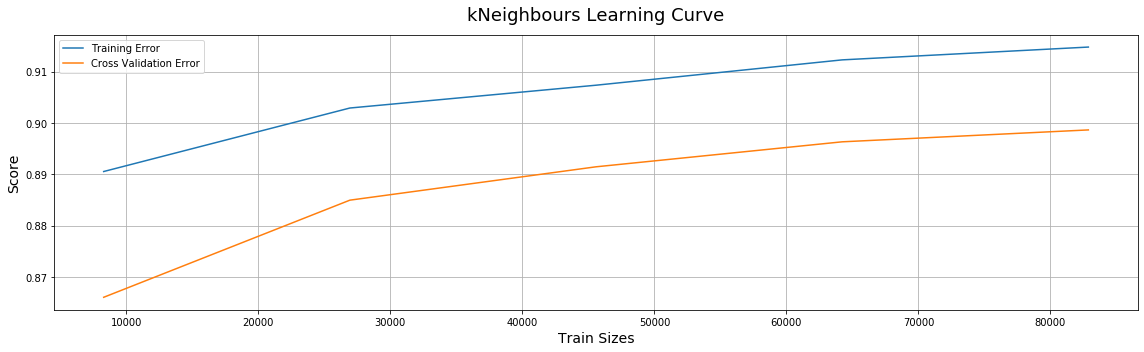

In [37]:
# Learning curve of KNN
plt.figure(figsize = (16,5))
title = 'kNeighbours Learning Curve'
plotLearningCurves(X_train_sc, y_train, knn,title)

### Decision Tree

In [63]:
# Implementation of Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

for d in range(20,30):
  dt = DecisionTreeClassifier(criterion='entropy', max_depth=d,max_leaf_nodes=1000)
  dt.fit(X_train_sc,y_train)
  pred_dt=dt.predict(X_test_sc)
  print("d=",d)
  print(accuracy_score(y_test,pred_dt))

d= 20
0.946907097073133
d= 21
0.9467912580122018
d= 22
0.9466368059309599
d= 23
0.9466368059309599
d= 24
0.9467526449918913
d= 25
0.946559579890339
d= 26
0.946212062707545
d= 27
0.9462506757278555
d= 28
0.9468684840528226
d= 29
0.9466368059309599


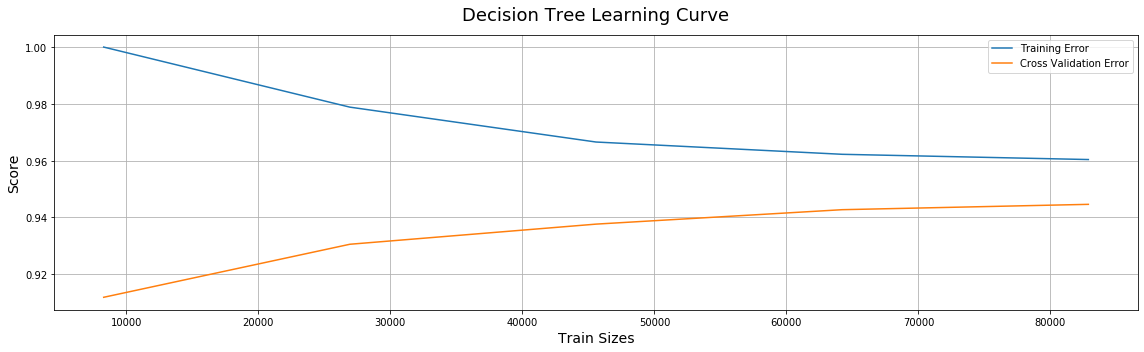

In [59]:
# Plotting the learning curve
from sklearn.tree import DecisionTreeClassifier
dt_best=DecisionTreeClassifier(criterion='entropy', max_depth=25,max_leaf_nodes=1000)
dt_best.fit(X_train,y_train)

#pred_dt=dt.predict(X_test)
plt.figure(figsize = (16,5))
title = 'Decision Tree Learning Curve'
plotLearningCurves(X_train_sc, y_train, dt_best,title)

### Random Forest

In [60]:
# Implementation of Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=40, criterion='entropy', max_depth=40,max_leaf_nodes=4100)
rfc.fit(X_train_sc, y_train)

pred_rfc = rfc.predict(X_test_sc)
rfc_train= rfc.predict(X_train_sc)
print('Test Score:',accuracy_score(y_test,pred_rfc))
print('Train Score:',accuracy_score(y_train,rfc_train))

print('Confusion Matrix for test set  \n',confusion_matrix(y_test,pred_rfc))



Test Score: 0.9551702834195691
Train Score: 0.9877207039357461
Confusion Matrix for test set  
 [[11241   450]
 [  711 13496]]


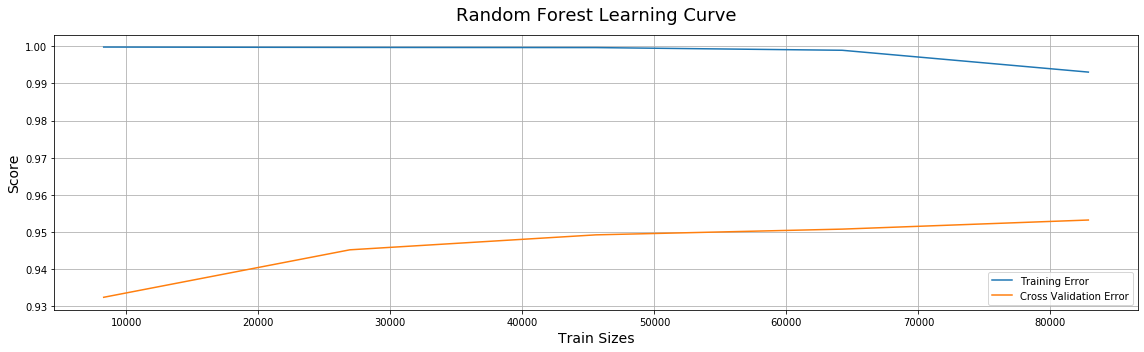

In [61]:
# Plot of learning curve
plt.figure(figsize = (16,5))
title = 'Random Forest Learning Curve'
plotLearningCurves(X_train_sc, y_train, rfc,title)

## 5) Model Evaluation Metrics

In [65]:
# The method to measure and visualize the metrics
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from matplotlib import pyplot as plt 
def ev_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

Accuracy = 0.9267511004710789
ROC Area under Curve = 0.9283064478708529
Time taken = 50.4378879070282
              precision    recall  f1-score   support

           0    0.89858   0.94432   0.92088     11691
           1    0.95217   0.91230   0.93181     14207

    accuracy                        0.92675     25898
   macro avg    0.92538   0.92831   0.92635     25898
weighted avg    0.92798   0.92675   0.92688     25898



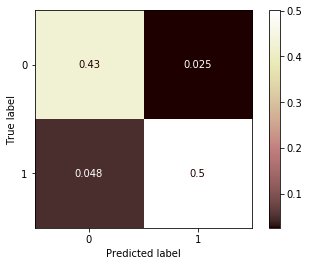

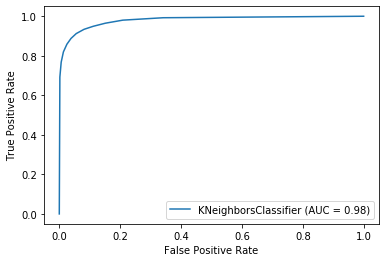

In [64]:
# Classification Report , Confusion Matrix and ROC curve for KNN

from sklearn.neighbors import KNeighborsClassifier


params_kn = {'n_neighbors':11, 'algorithm': 'kd_tree', 'n_jobs':2}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn, roc_auc_kn, tt_kn  = ev_model(model_kn, X_train_sc, y_train, X_test_sc, y_test)

Accuracy = 0.9468298710325121
ROC Area under Curve = 0.9478645732477441
Time taken = 0.542607307434082
              precision    recall  f1-score   support

           0    0.92627   0.95852   0.94212     11691
           1    0.96486   0.93721   0.95083     14207

    accuracy                        0.94683     25898
   macro avg    0.94556   0.94786   0.94647     25898
weighted avg    0.94744   0.94683   0.94690     25898



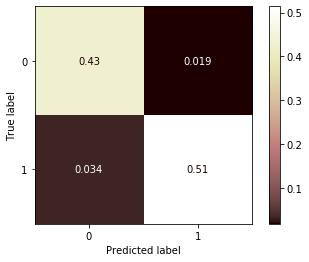

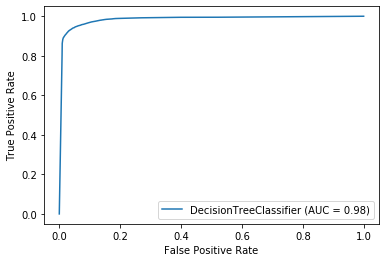

In [42]:
# Classification Report , Confusion Matrix and ROC curve for Decision Tree
from sklearn.tree import DecisionTreeClassifier


model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=25,max_leaf_nodes=1000)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = ev_model(model_dt, X_train_sc, y_train, X_test_sc, y_test)

Accuracy = 0.9549386052977064
ROC Area under Curve = 0.955558257037247
Time taken = 5.4000115394592285
              precision    recall  f1-score   support

           0    0.93967   0.96194   0.95067     11691
           1    0.96805   0.94918   0.95852     14207

    accuracy                        0.95494     25898
   macro avg    0.95386   0.95556   0.95460     25898
weighted avg    0.95524   0.95494   0.95498     25898



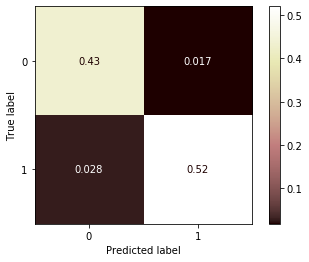

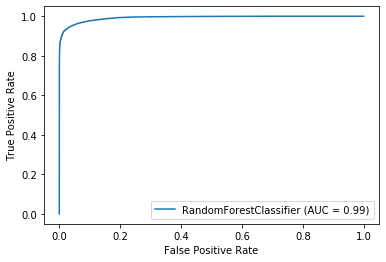

In [66]:
# Classification Report , Confusion Matrix and ROC curve for Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=40, criterion='entropy', max_depth=40,max_leaf_nodes=4100)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = ev_model(model_rf, X_train_sc, y_train, X_test_sc, y_test)